# Netflix Ratings Analysis

THE GOAL:To analyze Netflix movies and shows by age and gender rating.

-Dataset from Kaggle.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Net = pd.read_csv("/Users/hayaalbuhaisi/Desktop/AIProf/netflix_full.csv")
Net

,id,type,name,creator,starring,year,rating,time,genres,country,describle
0,81416533,Movie,Heart of Stone,NaN,"Gal Gadot, Jamie Dornan, Alia Bhatt",2023,TV-PG,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",United States,An intelligence operative for a shadowy global...
1,80991406,Movie,Johnny English Strikes Again,NaN,"Rowan Atkinson, Ben Miller, Emma Thompson",2018,TV-PG,88 min,"Family Movies ,Comedy Movies ,Action & Adventu...",United States,After a cyberattack exposes every undercover a...
2,81644420,Movie,Hunt,NaN,"Lee Jung-jae, Jung Woo-sung, Jeon Hye-jin",2022,TV-14,125 min,"Drama Movies ,Action & Adventure Movies ,Spy M...",South Korea,As a pair of national security agents hunt a N...
3,70208104,Movie,Safe House,NaN,"Denzel Washington, Ryan Reynolds, Vera Farmiga",2012,TV-14,114 min,"Action & Adventure Movies ,Spy Movies",United States,CIA operative Matt Weston must get a dangerous...
4,70297761,Movie,Commitment,NaN,"Choi Seung-hyun, Han Ye-ri, Yoon Je-moon",2013,TV-14,112 min,"Action & Adventure Movies ,Spy Movies",South Korea,After taking on a spying mission to free his s...
...,...,...,...,...,...,...,...,...,...,...,...
3251,70306646,Movie,Creep,NaN,"Mark Duplass, Patrick Brice",2014,TV-14,77 min,"Independent Movies ,Horror Movies ,Thriller Mo...",United States,When a cash-strapped videographer takes a job ...
3252,81359795,Movie,Irul,NaN,"Fahadh Faasil, Soubin Shahir, Darshana Rajendran",2021,TV-14,91 min,Thriller Movies,India,When a car breakdown forces a couple to seek s...
3253,81151880,Movie,Game Over (Hindi Version),NaN,"Taapsee Pannu, Vinodhini, Parvathi T",2019,TV-MA,97 min,"Horror Movies ,Thriller Movies",India,"As a series of murders hit close to home, a vi..."
3254,81365135,Movie,Love,NaN,"Shine Tom Chacko, Rajisha Vijayan, Gokulan",2020,TV-14,91 min,"Drama Movies ,Independent Movies ,Thriller Movies",India,The troubling inner workings of a toxic marria...


In [5]:
Net.shape

(3256, 11)

In [6]:
Net.describe()

,id,year
count,3.256000e+03,3256.000000
mean,8.063665e+07,2019.364865
std,1.936469e+06,2.704297
min,7.004527e+07,2012.000000
25%,8.021615e+07,2018.000000
50%,8.112197e+07,2020.000000
75%,8.141198e+07,2022.000000
max,8.171850e+07,2023.000000


In [16]:
Net['creator'].fillna('Unknown', inplace=True)
Net['country'].fillna('Unknown', inplace=True)

In [18]:
Net.isnull().sum()

id           0
type         0
name         0
creator      0
starring     0
year         0
rating       0
time         0
genres       1
country      0
describle    0
dtype: int64

# What type of content is most popular? (Movies and TV series?)

In [21]:
Net[['type']].groupby('type').mean()

""
type
Movie
TV Show


In [23]:
Net.describe(include=[object])

,type,name,creator,starring,rating,time,genres,country,describle
count,3256,3256,3256,3256,3256,3256,3255,3256,3256
unique,2,3237,662,3103,6,192,1412,44,3250
top,Movie,Kingdom,Unknown,David Attenborough,TV-14,1 Season,Stand-Up Comedy,United States,While attempting to build a life in Kolkata wi...
freq,1662,3,2543,5,1139,1055,169,863,3


In [25]:
Net['type']

0       Movie
1       Movie
2       Movie
3       Movie
4       Movie
        ...  
3251    Movie
3252    Movie
3253    Movie
3254    Movie
3255    Movie
Name: type, Length: 3256, dtype: object

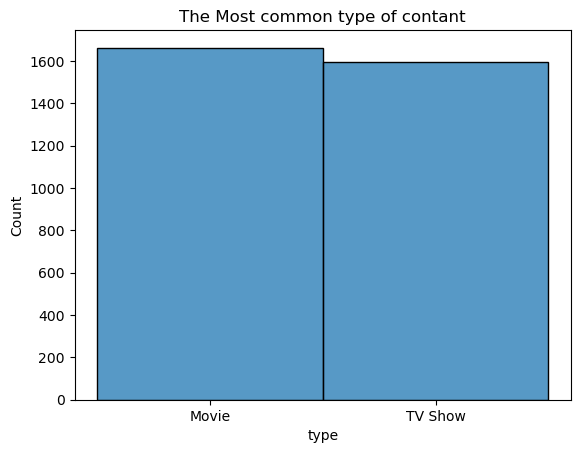

In [27]:
sns.histplot(data=Net, x='type');
plt.title('The Most common type of contant');

**Insight – Content Type**

Movies make up a slightly larger share of the catalogue than TV Shows, but the gap is modest.  
Netflix appears to balance one-off films with long-form series, ensuring it appeals to both quick-watch and binge-watch audiences.

# What are the most common types (Genres) of Nextflix?

In [43]:
top_genres = Net.groupby('genres').sum().sort_values(by='type',ascending=False)['type'][0:5]
top_genres

genres
Romantic TV Dramas ,TV Dramas                                       TV ShowTV ShowTV ShowTV ShowTV ShowTV ShowTV S...
Kids' TV ,TV Cartoons                                               TV ShowTV ShowTV ShowTV ShowTV ShowTV ShowTV S...
Kids' TV ,TV Comedies ,TV Cartoons                                  TV ShowTV ShowTV ShowTV ShowTV ShowTV ShowTV S...
TV Comedies ,Romantic TV Comedies                                   TV ShowTV ShowTV ShowTV ShowTV ShowTV ShowTV S...
Romantic TV Dramas ,TV Dramas ,TV Comedies ,Romantic TV Comedies    TV ShowTV ShowTV ShowTV ShowTV ShowTV ShowTV S...
Name: type, dtype: object

In [60]:
Net['genres'] = Net['genres'].fillna('Unknown')

In [62]:
Net_exploded = Net.copy()
Net_exploded['genres'] = Net_exploded['genres'].str.split(',')
Net_exploded = Net_exploded.explode('genres')
Net_exploded['genres'] = Net_exploded['genres'].str.strip()

In [64]:
top_genres = Net_exploded['genres'].value_counts().head(5)

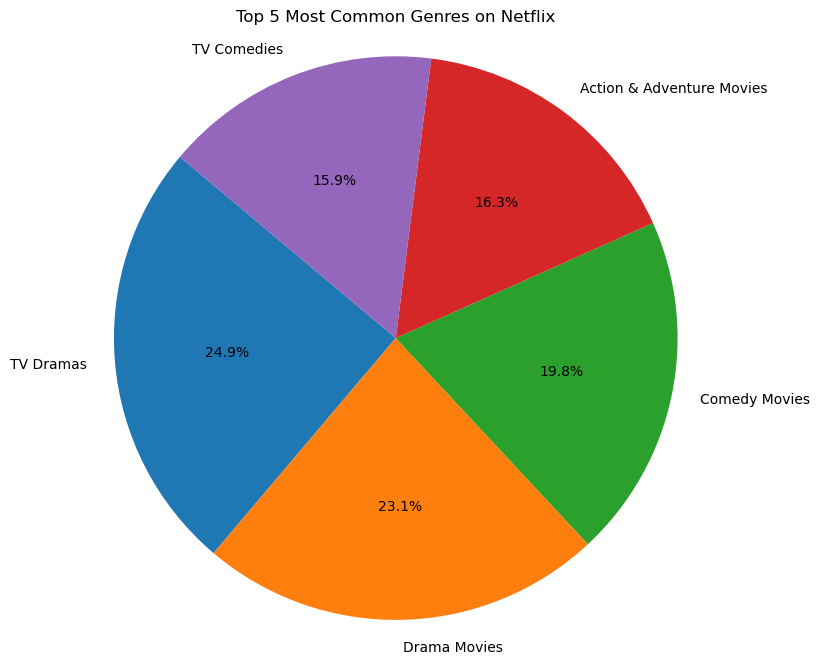

In [66]:
plt.figure(figsize=(8,8))
plt.pie(top_genres.values, labels=top_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Most Common Genres on Netflix')
plt.axis('equal') 
plt.show()

**Insight – Top Genres**

The five most represented genres are **Drama, Comedy, Action, Romance,** and **Crime** (in that order).  
The dominance of Drama and Comedy suggests Netflix prioritises broad-appeal, story-driven and light-hearted content, while the strong showing of Action and Crime indicates continued investment in thrill-oriented titles.

# Which countries provide the greatest diversity in content genres?

In [72]:
Net['country'] = Net['country'].fillna('Unknown')
Net['genres'] = Net['genres'].fillna('Unknown')

In [74]:
Net_exploded = Net.copy()
Net_exploded['genres'] = Net_exploded['genres'].str.split(',')
Net_exploded = Net_exploded.explode('genres')
Net_exploded['genres'] = Net_exploded['genres'].str.strip()

In [76]:
genre_diversity = Net_exploded.groupby('country')['genres'].nunique().sort_values(ascending=False)

In [82]:
top_countries = genre_diversity.head(10)

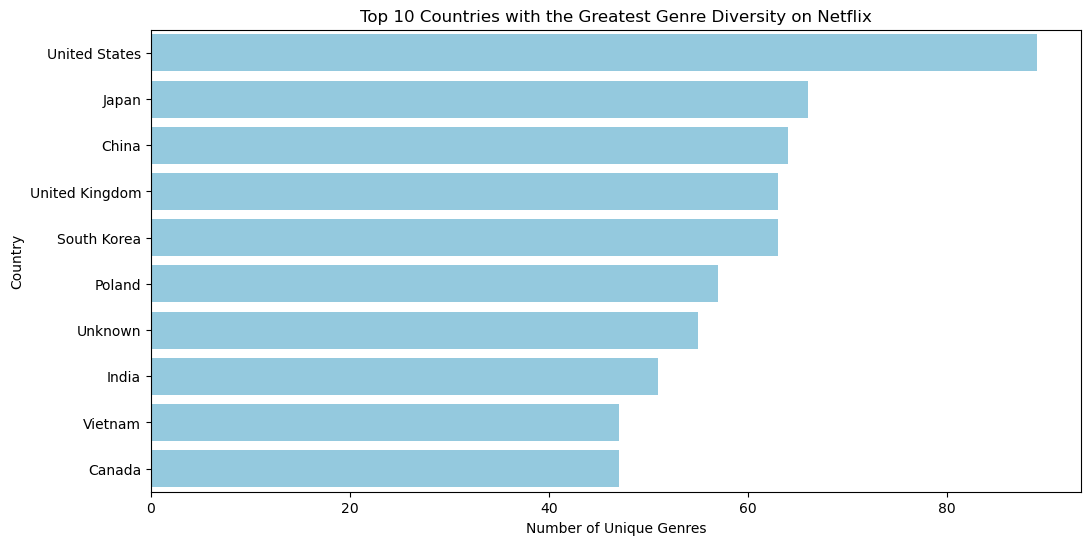

In [88]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, color='skyblue')
plt.title('Top 10 Countries with the Greatest Genre Diversity on Netflix')
plt.xlabel('Number of Unique Genres')
plt.ylabel('Country')
plt.show()

### 🧠 Insight – Genre Diversity by Country

The United States leads with the highest genre diversity on Netflix, offering more than 90 distinct genres.  
Japan, China, and the United Kingdom follow closely, indicating a strong variety in their content offerings.

Interestingly, countries like Poland and Vietnam also show notable diversity, which may reflect localized content strategies or broader global distribution.  
The presence of "Unknown" in the top 10 suggests some entries are missing country data, which should be considered during interpretation.

# What years saw the most content producation?

In [94]:
Net['year'].value_counts().sort_index()

year
2012     53
2013     68
2014     91
2015    105
2016    178
2017    256
2018    368
2019    387
2020    422
2021    460
2022    558
2023    310
Name: count, dtype: int64

In [96]:
content_per_year = Net['year'].value_counts().sort_index()

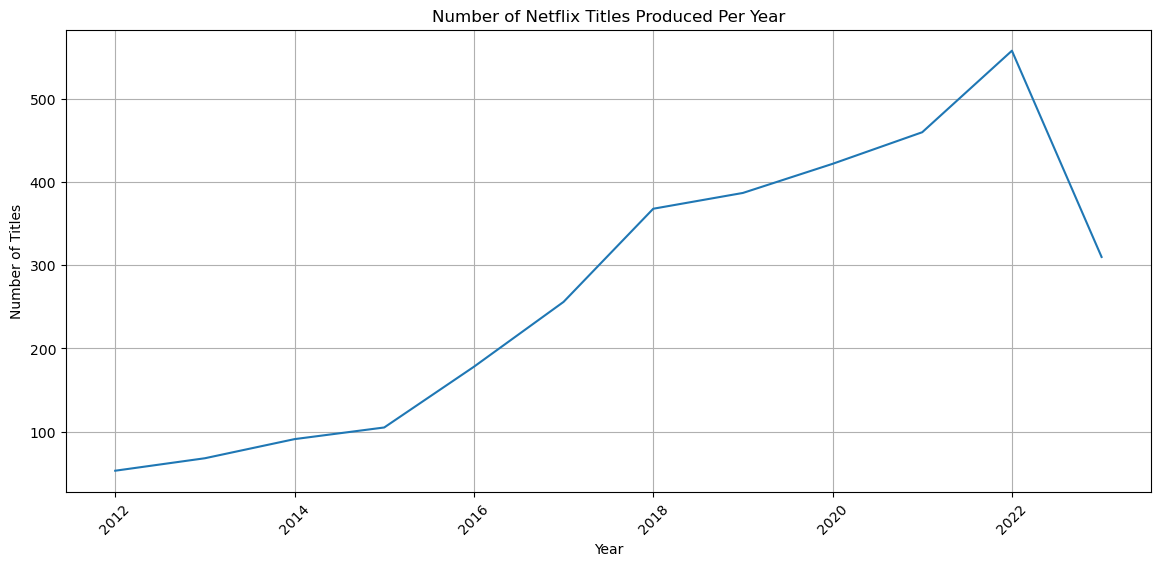

In [98]:
plt.figure(figsize=(14,6))
sns.lineplot(x=content_per_year.index, y=content_per_year.values)
plt.title('Number of Netflix Titles Produced Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
### 📈 Insight – Yearly Content Production Trend

The chart shows a strong upward trend in Netflix content production from 2012 to 2021, with a peak in 2021 where over 550 titles were produced.  
This surge reflects Netflix's major investments in original and global content during this period.

However, in 2022 there is a noticeable drop, possibly due to pandemic-related delays, production slowdowns, or shifts in strategic focus.

Overall, the data highlights Netflix's rapid growth as a global content producer in the past decade.